# EDA — Diabetes (sklearn)

Generated notebook with a structured Exploratory Data Analysis (EDA).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Quick peek

In [4]:
print('Shape:', df.shape)
display(df.head())

Shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Info and summary statistics

In [5]:
print('\nInfo:')
display(df.info())

print('\nDescribe:')
display(df.describe(include='all'))



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None


Describe:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Missing values and basic cleaning suggestions

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])
print('\nPercentage missing:')
display((df.isnull().mean()*100).sort_values(ascending=False).head(10))


Series([], dtype: int64)


Percentage missing:


age    0.0
sex    0.0
bmi    0.0
bp     0.0
s1     0.0
s2     0.0
s3     0.0
s4     0.0
s5     0.0
s6     0.0
dtype: float64

## Univariate analysis (distributions)

Numeric columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
Categorical columns: []


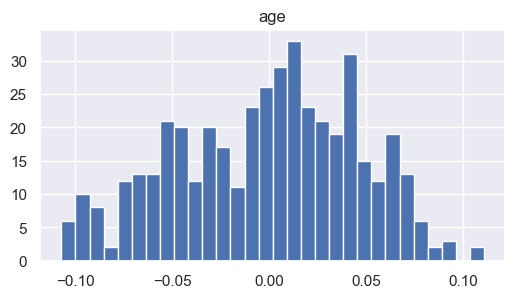

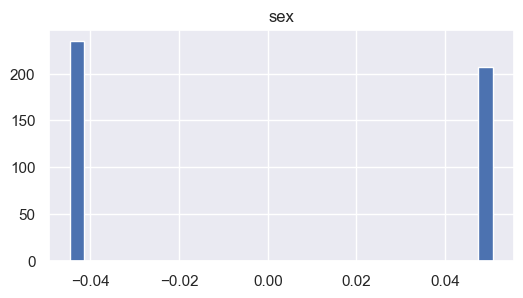

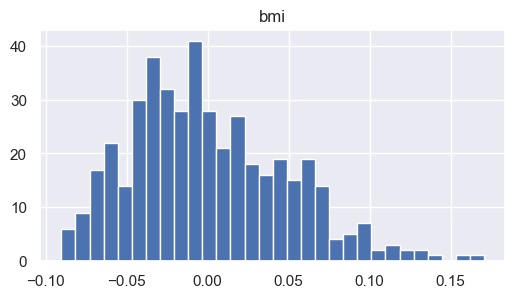

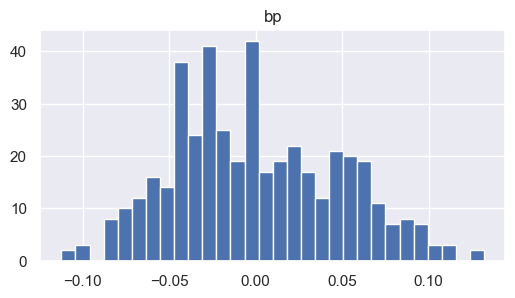

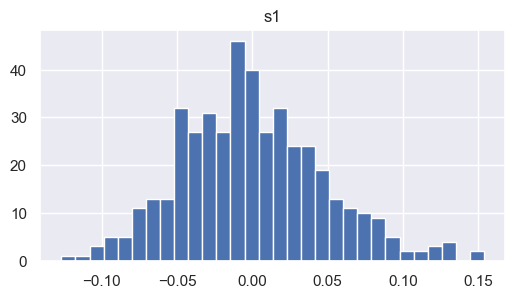

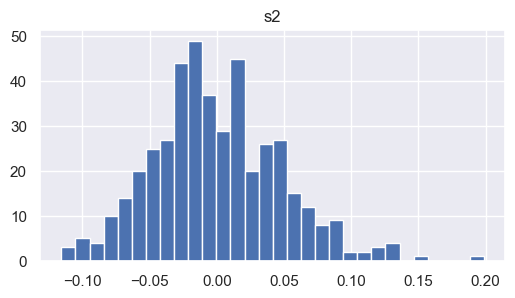

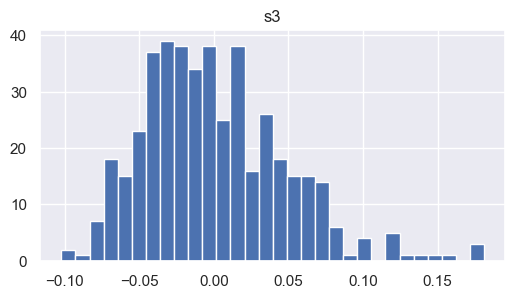

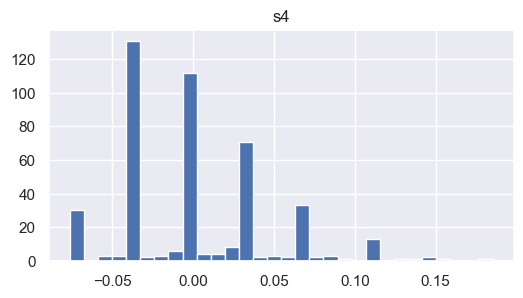

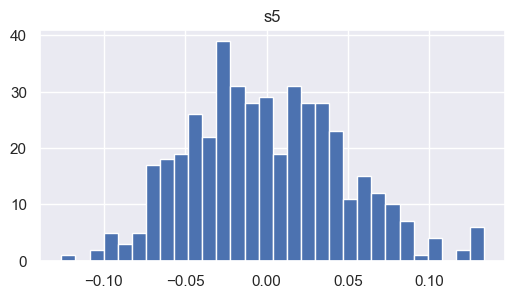

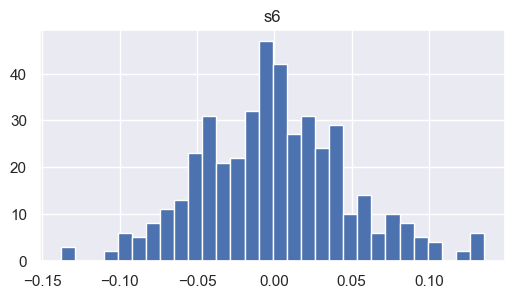

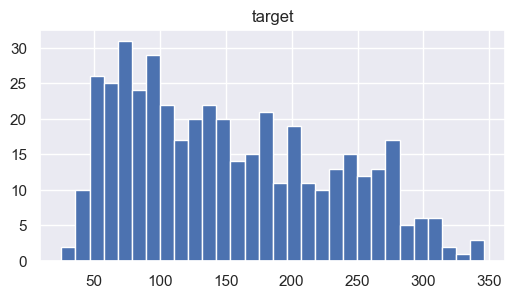

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric columns:', numeric_cols)
print('Categorical columns:', cat_cols)

for col in numeric_cols:
    try:
        plt.figure(figsize=(6,3))
        df[col].hist(bins=30)
        plt.title(col)
        plt.show()
    except Exception as e:
        print('Could not plot', col, e)

for col in cat_cols:
    try:
        plt.figure(figsize=(6,3))
        display(df[col].value_counts().head(15))
    except Exception as e:
        print('Could not show counts for', col, e)


## Bivariate analysis (pairs / boxplots / groupby)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


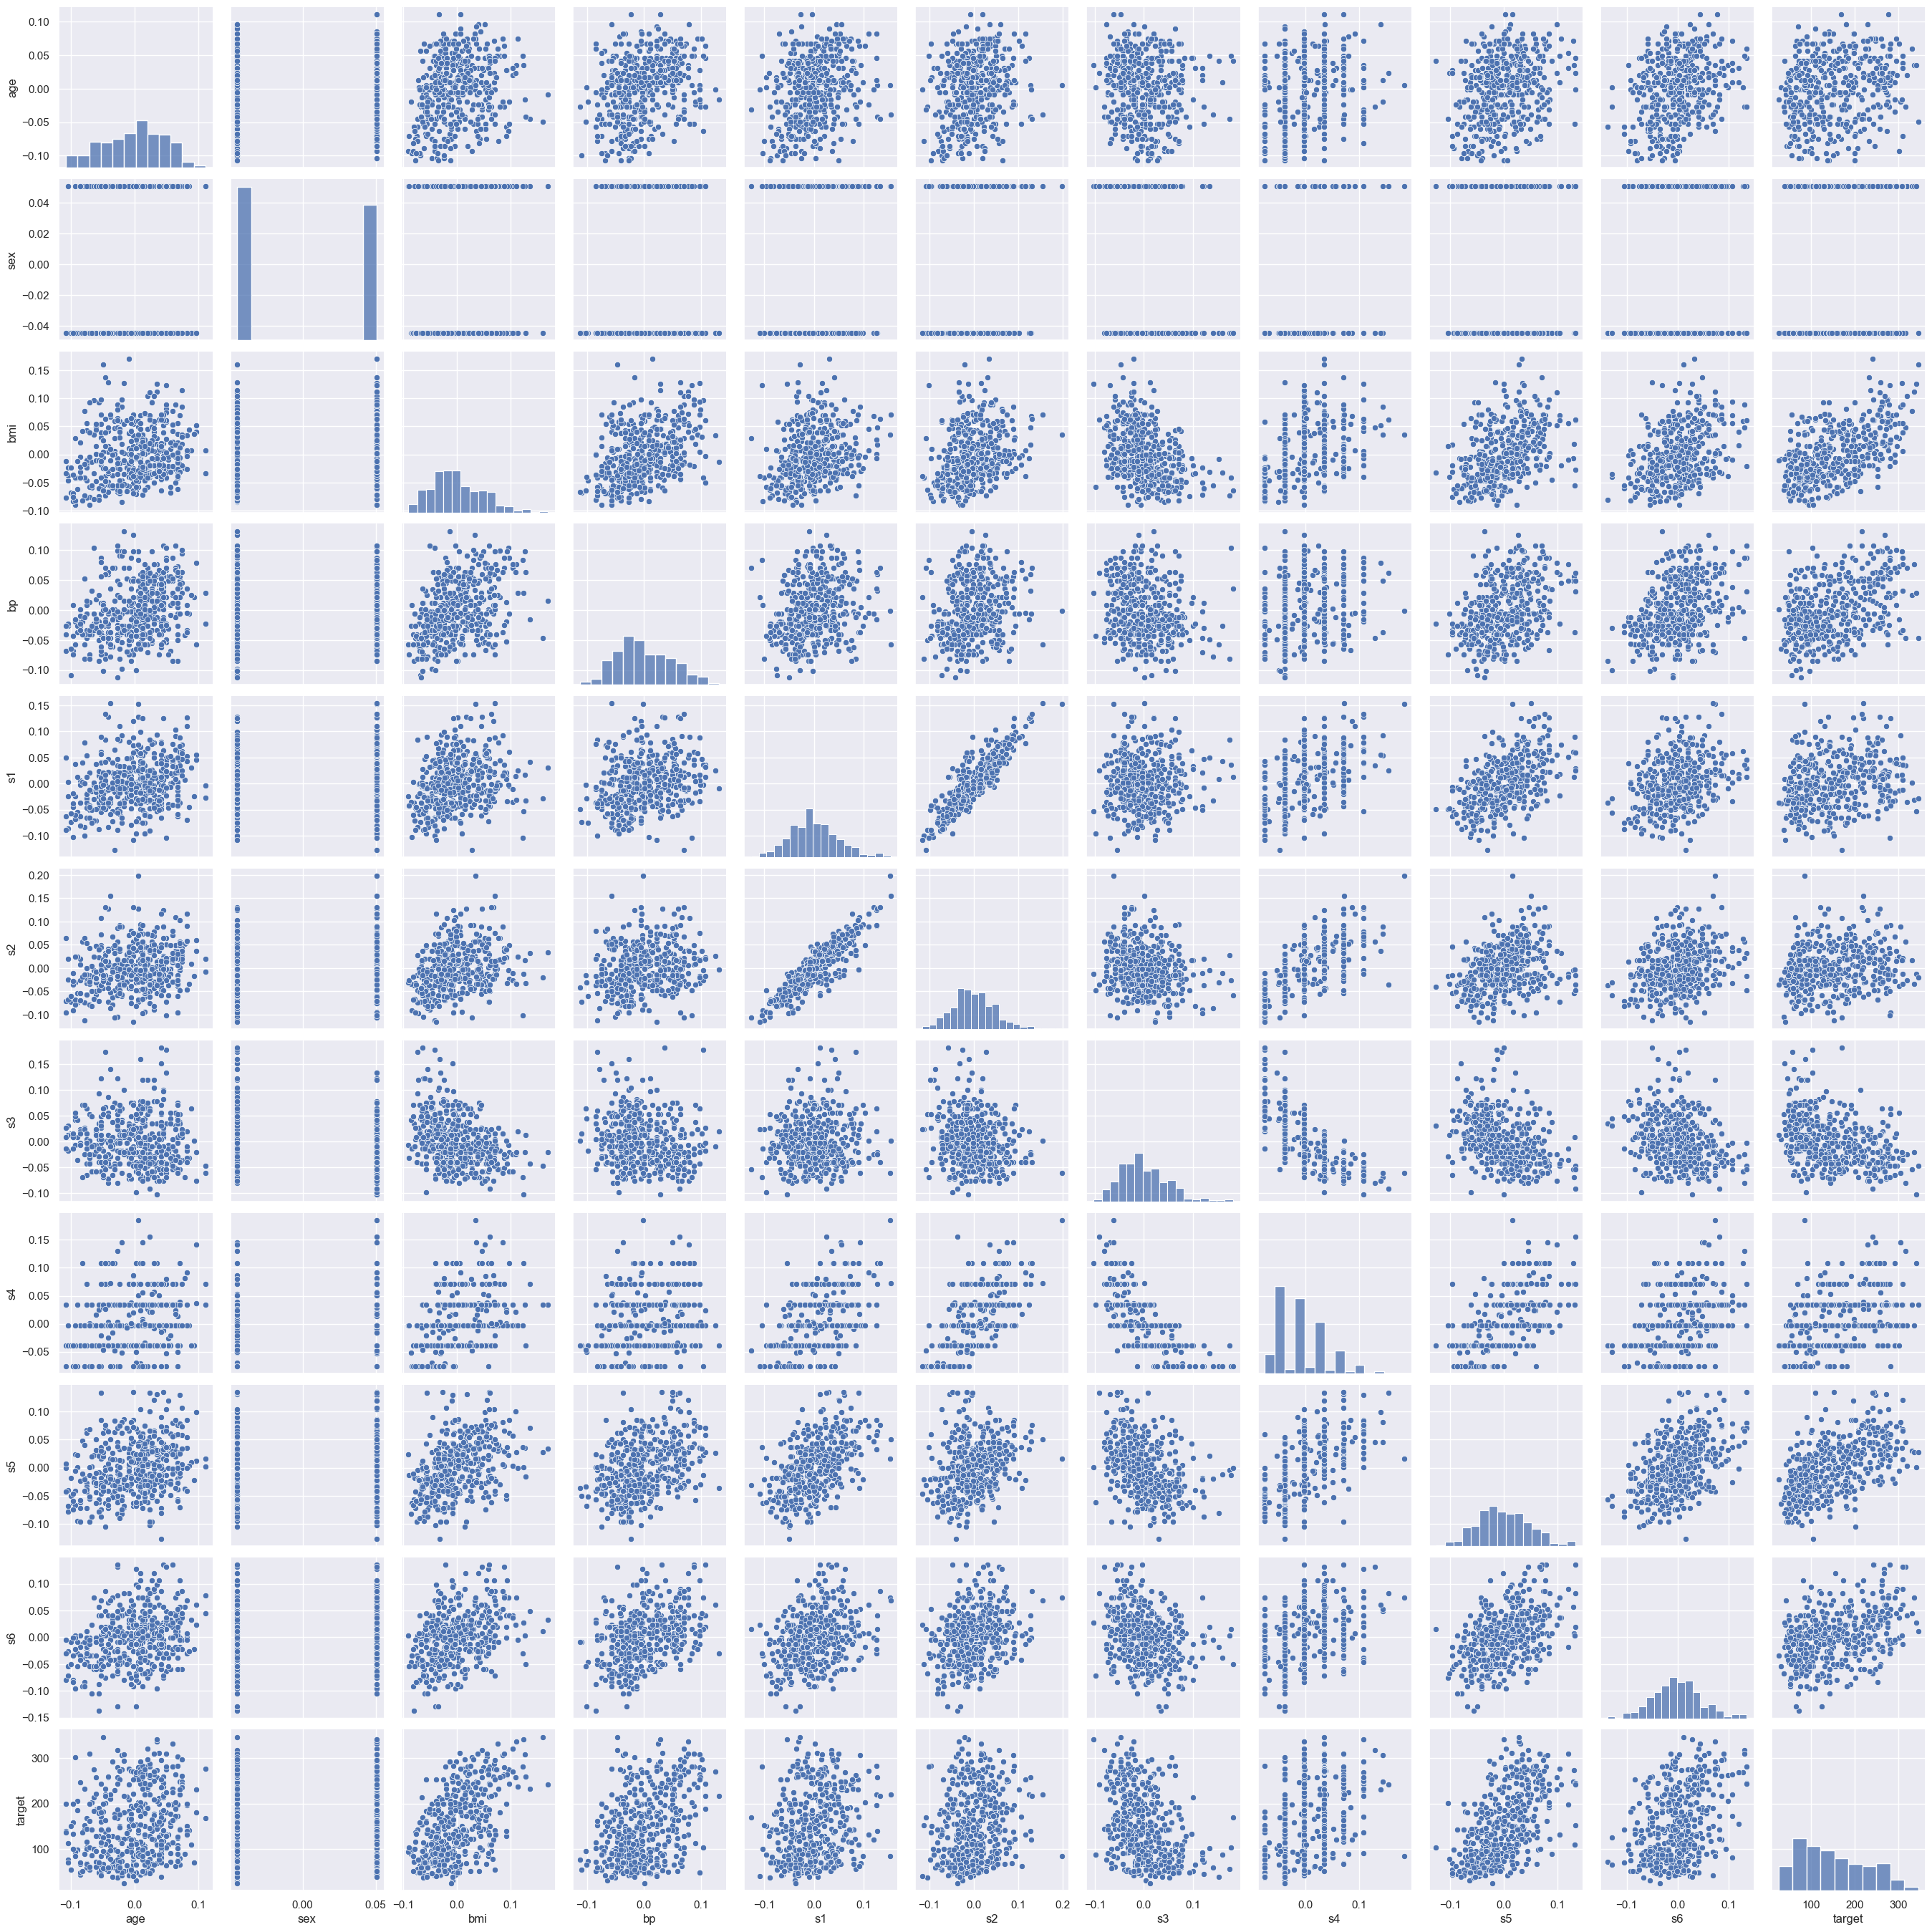

In [8]:
if len(numeric_cols) >= 2:
    try:
        display(df[numeric_cols].corr())
        sns.pairplot(df[numeric_cols].dropna().sample(min(500, len(df))))
    except Exception as e:
        print('Pairplot error:', e)

if len(cat_cols) > 0 and len(numeric_cols)>0:
    for c in cat_cols[:3]:
        for n in numeric_cols[:3]:
            try:
                plt.figure(figsize=(6,3))
                sns.boxplot(x=c, y=n, data=df)
                plt.title(f'Boxplot {n} by {c}')
                
                plt.show()
            except Exception as e:
                print('Boxplot error for', c, n, e)


## Correlation heatmap (numeric features)

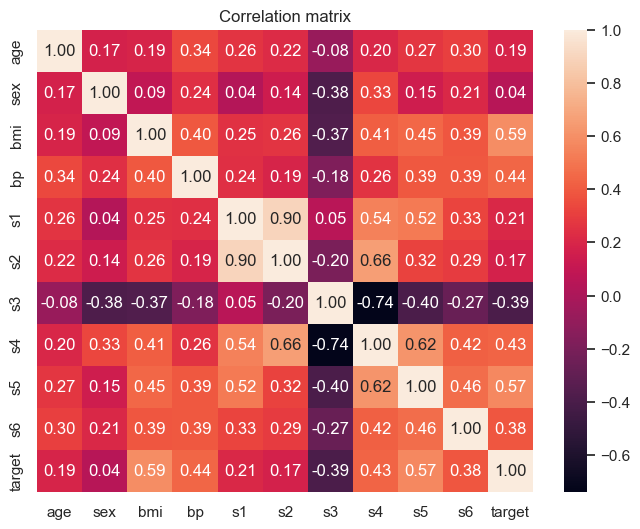

In [9]:
if len(numeric_cols)>0:
    try:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
        plt.title('Correlation matrix')
        plt.show()
    except Exception as e:
        print('Heatmap error:', e)


## Summary & next steps

- Summarize obvious issues (missing data, outliers, needed encodings).
- Suggest simple preprocessing: imputation, encoding categorical variables, scaling numeric features.
